Exercise_1

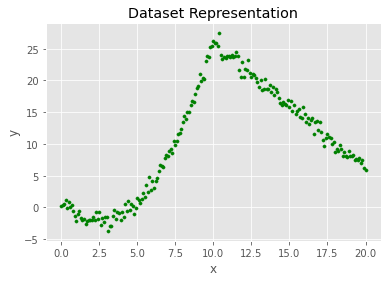

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support 

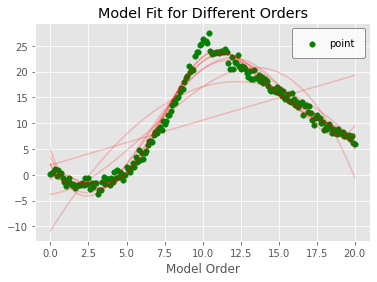

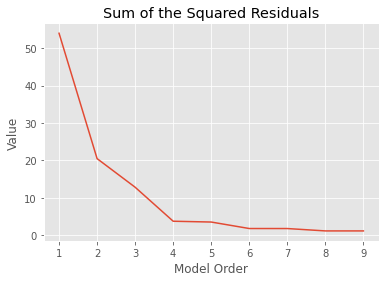

Min Cost is: 1.1420844114876645 Achieved for Model Order: 9


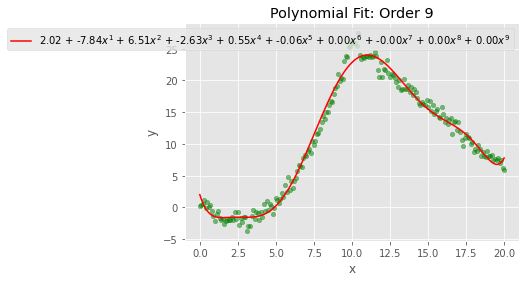

In [ ]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from scipy import linalg
import scipy.io
style.use('ggplot')

class PolynomialRegression(object):

    def __init__(self, x, y):
      self.x = x
      self.y = y

    def hypothesis(self, theta, x):
        h = theta[0]
        for i in np.arange(1, len(theta)):
            h += theta[i] * x ** i
        return h

    def computeCost(self):
        N = len(self.y)
        h = self.hypothesis(self.theta, self.x)
        errors = h - self.y
        return (1 / N) * np.sum(errors ** 2)

    def fit(self, order=1):
      self.order = order
      d = {}
      d['x' + str(0)] = np.ones([1, len(self.x)])[0]
      for i in np.arange(1, order + 1):
          d['x' + str(i)] = self.x ** (i)

      d = OrderedDict(sorted(d.items(), key=lambda t: t[0]))
      X = np.column_stack(d.values())

      theta = np.matmul(np.matmul(linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), self.y)
      self.theta = theta
      return self.theta

    def plot_predictedPolyLine(self):
        plt.figure()
        plt.scatter(self.x, self.y, s=20, color='green',alpha=0.5,zorder=1)
        line = self.theta[0]  # y-intercept
        label_holder = []
        label_holder.append('%.*f' % (2, self.theta[0]))
        for i in np.arange(1, len(self.theta)):
            line += self.theta[i] * self.x ** i
            label_holder.append(' + ' + '%.*f' % (2, self.theta[i]) + r'$x^' + str(i) + '$')

        plt.plot(self.x, line, label=''.join(label_holder),zorder=2,c='r')
        plt.title('Polynomial Fit: Order ' + str(len(self.theta) - 1))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend(loc='best')
        plt.show()
        return line

    def predict(self):
        line = self.theta[0]  # y-intercept
        for i in np.arange(1, len(self.theta)):
            line += self.theta[i] * self.x ** i
        return line

mat = scipy.io.loadmat('A.mat')
x_pts = np.reshape (mat['x'], -1)
y_pts = np.reshape (mat['y'], -1)

plt.scatter(x_pts, y_pts,s=10, color='g', label='point')
plt.title("Dataset Representation")
plt.xlabel('x')
plt.ylabel('y')
plt.show()
fig, ax = plt.subplots()
max_order = 9
costs = np.full(max_order,100.)
models = []
for order in np.arange (0,max_order):

    model = PolynomialRegression(x_pts, y_pts)

    model.fit( order=order+1)
    costs[order] = model.computeCost()
    y_pred = model.predict()
    ax.plot(x_pts,y_pred, color='red', alpha=0.2)
    models.append(model)

ax.scatter(x_pts, y_pts,s=30, color='g', label='point')
ax.legend(facecolor='w', fancybox=True, frameon=True, edgecolor='black', borderpad=1)
plt.title("Model Fit for Different Orders")
plt.xlabel('Model Order')
plt.show()

plt.figure()
plt.plot (np.arange(1,max_order+1), costs)
plt.title("Sum of the Squared Residuals")
plt.xlabel('Model Order')
plt.ylabel('Value')
# plt.axis([0,max_order,0,50])
plt.show()

for model in models:
  if model.computeCost() == costs.min():
    print ("Min Cost is: "+str(model.computeCost())+" Achieved for Model Order: "+str(model.order))
    model.plot_predictedPolyLine()

plt.show()


Exercise_2

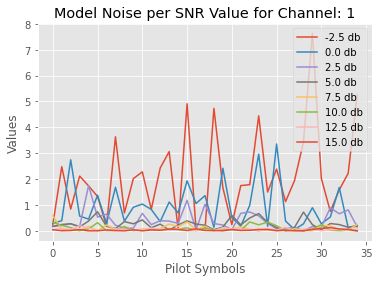

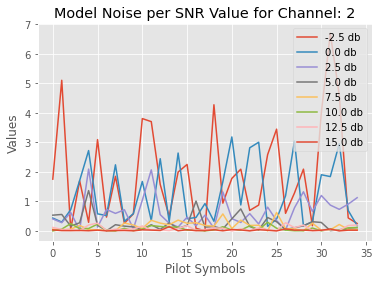

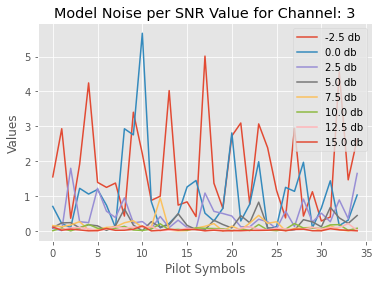

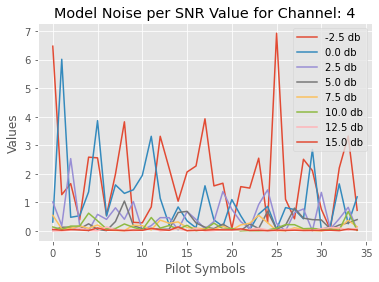

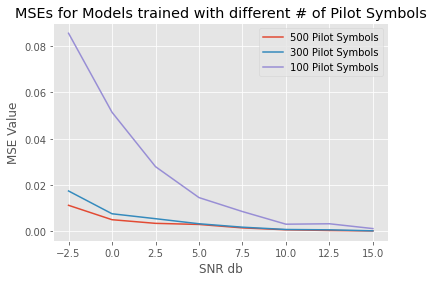

In [7]:
import numpy as np
from scipy import linalg
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib import style
import scipy.io

style.use('ggplot')

def LS_Estimate(S, Y):
    H_pred = np.dot (np.dot(Y,S.getH()),linalg.inv(np.dot(S,S.getH())))
    return H_pred

def calculate_H (S, Y, no_of_points):
  H = {}
  for i in Y.keys():
    H[i] = LS_Estimate(part_until(S, no_of_points), part_until(Y[i], no_of_points))
  return H  
def part_until (X, no_of_points):
  return X[:].T[:no_of_points].T

def part_from (X, no_of_points):
  return X[:].T[no_of_points:].T

def calculate_mse(Y,S,H,H_true):
  assert Y.keys() == H.keys()
  mse = np.zeros(8)
  for index in Y.keys():
    mean = (np.sum(np.power(np.abs(np.subtract(np.dot (H_true,S), np.dot (H[index],S))),2)))/2000
    mse[index-1] = mean
  return mse

def calculate_mse_sub(Y,S,H,H_true,no_of_points, total):
  assert Y.keys() == H.keys()
  mse = np.zeros(8)
  for index in Y.keys():
    mean = (np.sum(np.power(np.abs(np.subtract(np.dot (H_true,part_from(S,no_of_points)), np.dot (H[index],part_from(S,no_of_points)))),2)))/ total
    mse[index-1] = mean
  return mse

def plot_noise(Y,S,H_true,channel,start,stop):
  plt.title("Model Noise per SNR Value for Channel: "+str(channel))
  snr_values = np.arange(-2.5,17.5,2.5)
  for index in Y.keys():
    plt.plot(np.transpose(np.abs(np.power(np.subtract(Y[index], np.dot(H_true,S)),2))[channel-1])[start:stop], label=str(snr_values[index-1])+' db')
  plt.legend(loc='upper right')
  plt.ylabel('Values')
  plt.xlabel('Pilot Symbols')
  plt.show()

mat = scipy.io.loadmat('B.mat')
H_true = mat['H']
H_true = np.matrix(H_true)

S = mat['S']
S= np.matrix(S)

Y = {}
Y[1] = np.matrix(mat['Y1'])
Y[2] = np.matrix(mat['Y2'])
Y[3] = np.matrix(mat['Y3'])
Y[4] = np.matrix(mat['Y4'])
Y[5] = np.matrix(mat['Y5'])
Y[6] = np.matrix(mat['Y6'])
Y[7] = np.matrix(mat['Y7'])
Y[8] = np.matrix(mat['Y8'])

Y = OrderedDict(sorted(Y.items(), key=lambda t: t[0]))

plot_noise(Y, S, H_true, channel=1, start=0, stop=35)
plot_noise(Y, S, H_true, channel=2, start=0, stop=35)
plot_noise(Y, S, H_true, channel=3, start=0, stop=35)
plot_noise(Y, S, H_true, channel=4, start=0, stop=35)

H_500 = calculate_H (S, Y, 500)
H_300 = calculate_H (S, Y, 300)
H_100 = calculate_H (S, Y, 100)

plt.plot (np.arange(-2.5,17.5,2.5),calculate_mse(Y,S,H_500,H_true),label='500 Pilot Symbols')
plt.plot (np.arange(-2.5,17.5,2.5),calculate_mse_sub(Y,S,H_300,H_true,300,1200),label='300 Pilot Symbols')
plt.plot (np.arange(-2.5,17.5,2.5),calculate_mse_sub(Y,S,H_100,H_true,100,1600),label='100 Pilot Symbols')
plt.legend(loc='best')
plt.title("MSEs for Models trained with different # of Pilot Symbols")
plt.xlabel('SNR db')
plt.ylabel('MSE Value')
plt.show()